'The most difficult thing in life is to know yourself'

This quote belongs to Thales of Miletus. Thales was a Greek/Phonecian philosopher, mathematician and astronomer, which is recognised as the first individual in Western civilisation known to have entertained and engaged in scientific thought (source: https://en.wikipedia.org/wiki/Thales)

We won't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.

So we tried to learn how to swim before jumping into the water. Based on Hair et al. (2013), chapter 'Examining your data', I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [48]:
df = pd.read_csv("houses_to_rent_combined.csv")

What we will be doing in EDA are as follows:-
1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and      importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('rent') and try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.

Our statistical models makes good assumptions about:-
1. Linearity: assumes that the relationship between predictors and target variable is linear
2. No noise: eg. that there are no outliers in the data
3. No collinearity: if you have highly correlated predictors, it’s most likely your model will overfit
4. Normal distribution: more reliable predictions are made if the predictors and the target variable are normally distributed
5. Scale: it’s a distance-based algorithm, so preditors should be scaled — like with standard scaler

In [49]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,Hassoc_tax,rent,prop_tax,fire_insur
0,1,240,3,3,4,0,acept,furnished,0,8000,1000,121
1,0,64,2,1,1,10,acept,not furnished,540,820,122,11
2,1,443,5,5,4,3,acept,furnished,4172,7000,1417,89
3,1,73,2,2,1,12,acept,not furnished,700,1250,150,16
4,1,19,1,1,0,0,not acept,not furnished,0,1200,41,16


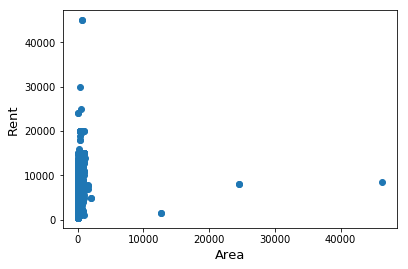

In [50]:
fig, ax = plt.subplots()
ax.scatter(x = df['area'], y = df['rent'])
plt.ylabel('Rent', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()

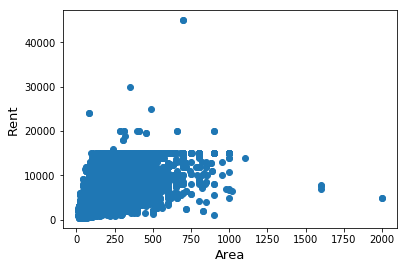

In [51]:
#Deleting outliers
df = df.drop(df[(df['area']>10000) & (df['rent']<22000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(x = df['area'], y = df['rent'])
plt.ylabel('Rent', fontsize=13)
plt.xlabel('Area', fontsize=13)
plt.show()

NOTE

Outliers removal is not always safe. We decided to delete these three as they are very huge and really bad ( extremely large areas for very low prices).

There are probably others outliers in the training data. However, removing all them may affect badly our models if ever there were also outliers in the test data. That's why , instead of removing them all, we will just manage to make some of our models robust on them. 

Here, we can safely delete those rows which has 'area' > 10,000. So, let's do it...


 mu = 4151.97 and sigma = 3505.43



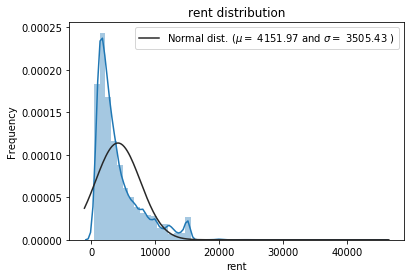

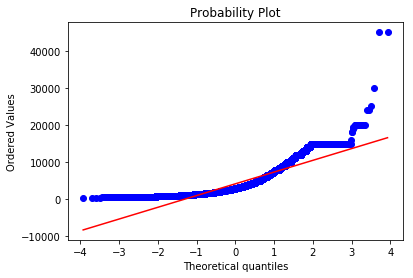

In [52]:
sns.distplot(df['rent'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['rent'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('rent distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['rent'], plot=plt)
plt.show()

The target variable is right skewed. As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

Ok, 'rent' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When we discovered this, we felt like an Hogwarts' student discovering a new cool spell.

To learn more about skewness: https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/


 mu = 8.02 and sigma = 0.79



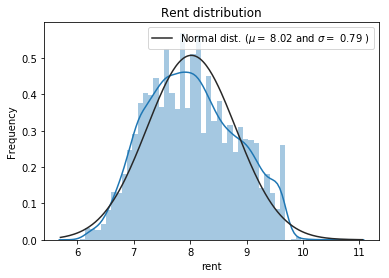

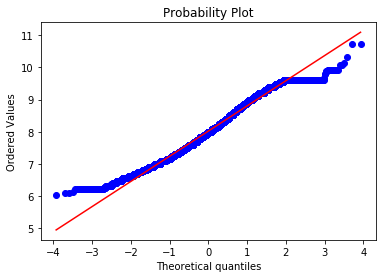

In [53]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["rent"] = np.log1p(df["rent"])
df['area'] = np.log1p(df['area'])

#Check the new distribution 
sns.distplot(df['rent'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['rent'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Rent distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['rent'], plot=plt)
plt.show()

The skew seems now corrected and the data appears more normally distributed.

Now, check if data has any NaN value.

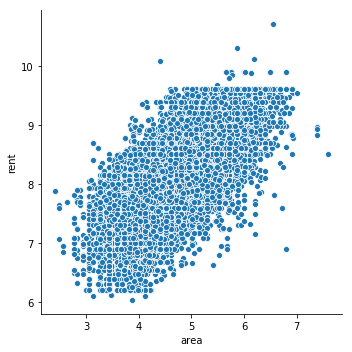

In [56]:
#plot after reducing skewness from the columns 'area' and 'rent'
sns.relplot(x = 'area', y='rent', data = df)

In [54]:
df.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
floor             0
animal            0
furniture         0
Hassoc_tax        0
rent              0
prop_tax          0
fire_insur        0
dtype: int64

DATA CORRELATION

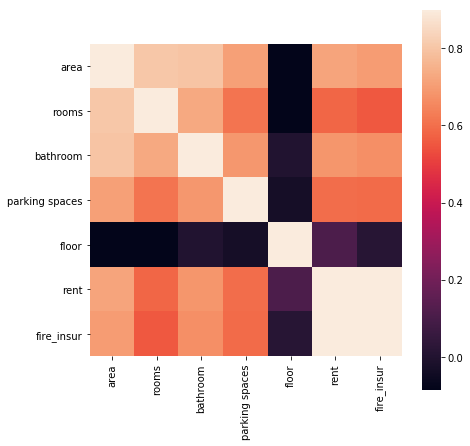

In [55]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(7,7))
sns.heatmap(corrmat, vmax=0.9, square=True)